# Analyzing Virat Kohli's overall Batting Performance

In this project, we will be analyzing Virat Kohli's performance from his debut to the very recent match - WT20 2024 Final against South Africa. 

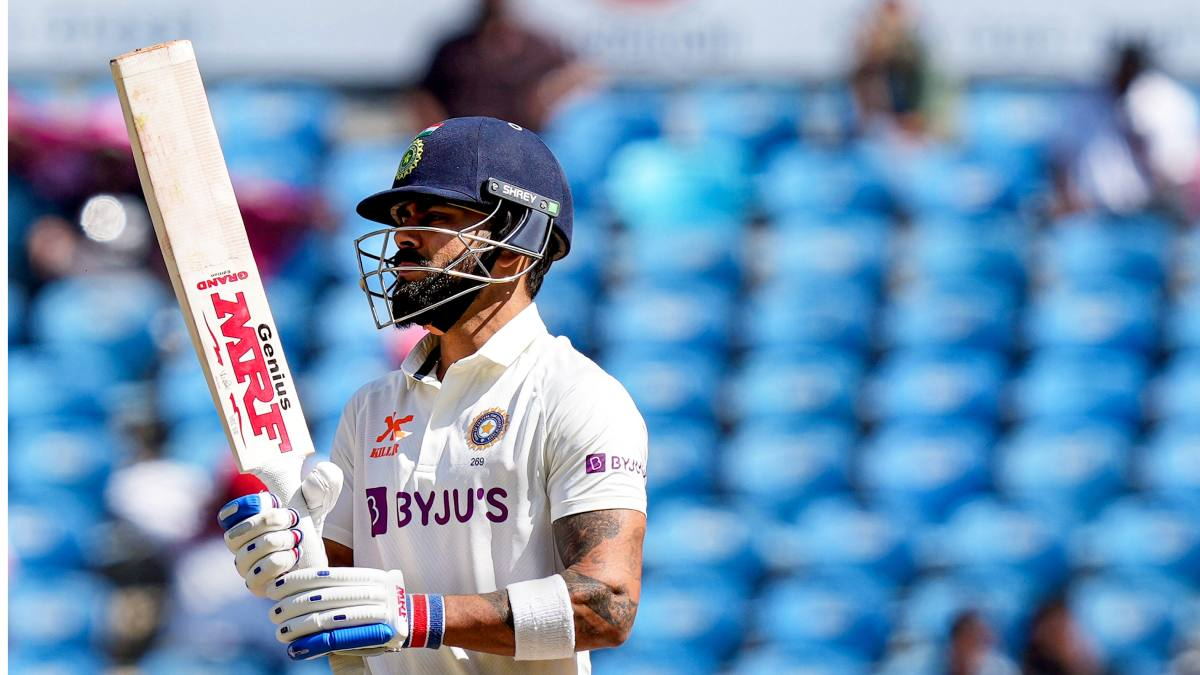

Let us import the necessary libraries first.

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as cb
import warnings as wr

wr.filterwarnings('ignore')

ModuleNotFoundError: No module named 'numpy'

Now, we will import the <code>html-table-parser </code>, <code>urllib</code>, and <code>pprint</code> libraries to scrape data from ESPNCricInfo website- https://stats.espncricinfo.com/ci/engine/player/253802.html?class=11;template=results;type=batting;view=innings .

Let us go ahead.

In [ ]:
!pip install html-table-parser-python3
import urllib.request
from pprint import pprint
from html_table_parser.parser import HTMLTableParser

## Extracting Data

In [ ]:
# Opens a website and read its binary contents (HTTP Response Body)

def url_get_contents(url):
  headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
  req = urllib.request.Request(url=url, headers=headers)
  f = urllib.request.urlopen(req)
  return f.read()

In [ ]:
xhtml = url_get_contents('https://stats.espncricinfo.com/ci/engine/player/253802.html?class=11;template=results;type=batting;view=innings').decode('utf-8')

# Defining the HTMLTableParser object
p = HTMLTableParser()
p.feed(xhtml)

# converting the parsed data to
# dataframe
virat = pd.DataFrame(p.tables[3])
virat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,,Opposition,Ground,Start Date,
1,12,33,22,1,0,54.54,2,lbw,1,,ODI v Sri Lanka,Dambulla,18 Aug 2008,ODI # 2742
2,37,82,67,6,0,55.22,2,caught,2,,ODI v Sri Lanka,Dambulla,20 Aug 2008,ODI # 2745
3,25,40,38,4,0,65.78,1,run out,1,,ODI v Sri Lanka,Colombo (RPS),24 Aug 2008,ODI # 2750
4,54,87,66,7,0,81.81,1,bowled,1,,ODI v Sri Lanka,Colombo (RPS),27 Aug 2008,ODI # 2755


We have extracted the data. Now, it is time to get going. We will perform the data cleaning first.

## Preparing the Data

Now, we will be preparing our dataframe. Our first order of business is to modify the metadata of the dataframe. Let us see.

### 1. Renaming Columns

First, we will rename the columns, and remove the row containing the names of the columns. Let us do that.

In [ ]:
virat.columns=virat.loc[0].values
virat.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,,Opposition,Ground,Start Date,
0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,,Opposition,Ground,Start Date,
1,12,33,22,1,0,54.54,2,lbw,1,,ODI v Sri Lanka,Dambulla,18 Aug 2008,ODI # 2742
2,37,82,67,6,0,55.22,2,caught,2,,ODI v Sri Lanka,Dambulla,20 Aug 2008,ODI # 2745
3,25,40,38,4,0,65.78,1,run out,1,,ODI v Sri Lanka,Colombo (RPS),24 Aug 2008,ODI # 2750
4,54,87,66,7,0,81.81,1,bowled,1,,ODI v Sri Lanka,Colombo (RPS),27 Aug 2008,ODI # 2755


### 2. Removing Unnecessary Rows and Columns

Now, we would remove the last column, since it is not too relevant in our analysis, and the first row, since it already is there as headers.

In [ ]:
virat = virat.iloc[1:,:-1]
virat.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,,Opposition,Ground,Start Date
1,12,33,22,1,0,54.54,2,lbw,1,,ODI v Sri Lanka,Dambulla,18 Aug 2008
2,37,82,67,6,0,55.22,2,caught,2,,ODI v Sri Lanka,Dambulla,20 Aug 2008
3,25,40,38,4,0,65.78,1,run out,1,,ODI v Sri Lanka,Colombo (RPS),24 Aug 2008
4,54,87,66,7,0,81.81,1,bowled,1,,ODI v Sri Lanka,Colombo (RPS),27 Aug 2008
5,31,45,46,3,1,67.39,1,lbw,2,,ODI v Sri Lanka,Colombo (RPS),29 Aug 2008


Our data is ready for inspection. Let us check.

### 3. Inspecting the Data

Let us start with some basic information about our dataset. It includes size, attributes and types of data.

In [ ]:
virat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 1 to 616
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        616 non-null    object
 1   Mins        616 non-null    object
 2   BF          616 non-null    object
 3   4s          616 non-null    object
 4   6s          616 non-null    object
 5   SR          616 non-null    object
 6   Pos         616 non-null    object
 7   Dismissal   616 non-null    object
 8   Inns        616 non-null    object
 9               616 non-null    object
 10  Opposition  616 non-null    object
 11  Ground      616 non-null    object
 12  Start Date  616 non-null    object
dtypes: object(13)
memory usage: 62.7+ KB


In [ ]:
orig = virat.shape; orig

(616, 13)

Hence, we have a data of total 616 innings played by Virat Kohli, measured via 13 parameters. We will now proceed towards cleaning the data.

### 4. Cleaning the Data

Now, we will sanitize our data, to prepare it for analysis. Let us start.

We know that there is an additional column, which seems to be blank. Let us check what it is.

In [ ]:
display(virat.iloc[:,9].value_counts(),
        virat.columns)


    616
Name: count, dtype: int64

Index(['Runs', 'Mins', 'BF', '4s', '6s', 'SR', 'Pos', 'Dismissal', 'Inns', '',
       'Opposition', 'Ground', 'Start Date'],
      dtype='object')

This column is entirely blank, and does not provide any input to our data. Hence, let us drop it.

In [ ]:
virat = virat.drop("",axis=1)
virat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 1 to 616
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        616 non-null    object
 1   Mins        616 non-null    object
 2   BF          616 non-null    object
 3   4s          616 non-null    object
 4   6s          616 non-null    object
 5   SR          616 non-null    object
 6   Pos         616 non-null    object
 7   Dismissal   616 non-null    object
 8   Inns        616 non-null    object
 9   Opposition  616 non-null    object
 10  Ground      616 non-null    object
 11  Start Date  616 non-null    object
dtypes: object(12)
memory usage: 57.9+ KB


Great. Moving forward, let us change the data types of the columns. Let us study the type of values for each column.

In [ ]:
for i in virat.columns:
  print(f"\n--------------------- Col Name: {i} ------------------\n")
  print(virat[i].value_counts())


--------------------- Col Name: Runs ------------------

Runs
0       37
DNB     21
9       17
1       16
3       13
        ..
90*      1
138      1
44*      1
33       1
101*     1
Name: count, Length: 203, dtype: int64

--------------------- Col Name: Mins ------------------

Mins
-      95
6      15
13     11
8      10
3       8
       ..
279     1
267     1
192     1
124     1
137     1
Name: count, Length: 206, dtype: int64

--------------------- Col Name: BF ------------------

BF
-      28
5      20
8      14
22     14
9      13
       ..
213     1
246     1
101     1
115     1
182     1
Name: count, Length: 165, dtype: int64

--------------------- Col Name: 4s ------------------

4s
0     117
1      75
2      71
3      58
4      46
5      37
7      31
-      28
6      28
9      26
8      22
11     15
10     12
12     11
13      7
16      6
18      5
15      4
14      4
22      2
20      2
24      2
25      2
17      2
19      1
21      1
33      1
Name: count, dtype: int64

-

Now, based on this, we can classify the columns into 3 categories :

1. Integer - Runs, Mins, BF, 4s, 6s
2. Category - Ground, Opposition, Dismissal, Pos, Inns
3. Decimal - Strike Rate (SR)
4. Date - Start Date

Let us transform the columns now.

In [ ]:
numeric = ['Runs','Mins','BF','4s','6s']
category = ['Ground','Dismissal','Opposition','Pos','Inns']
decimal = 'SR'
date = 'Start Date'

#### Numeric Columns

Let us study the numerical columns one by one.

In [ ]:
virat['Runs'].unique()

array(['12', '37', '25', '54', '31', '2*', '16', 'TDNB', '79*', '30',
       '10', '27', '107', '9', '91', '71*', '102*', '2', 'DNB', '57', '0',
       '82', '18', '68', '26*', '11', '28', '8', '118', '105', '64',
       '63*', '22', '87*', '100*', '34', '1', '59', '24', '35', '14',
       '81', '94', '4', '15', '55', '7', '112*', '86*', '52', '63', '3',
       '117', '20', '23*', '80', '23', '44', '75', '116', '77', '66',
       '21', '133*', '108', '183', '106', '38', '128*', '58', '103',
       '51*', '70', '50', '40', '78*', '19', '14*', '6', '77*', '26',
       '67*', '41', '22*', '58*', '43', '102', '115', '68*', '29', '61',
       '115*', '86', '99', '119', '96', '46', '123', '78', '67', '105*',
       '136', '48', '5', '36*', '57*', '72*', '39', '1*', '13', '62',
       '127', '49', '53', '139*', '141', '169', '147', '3*', '33*', '33',
       '44*', '138', '88', '90*', '59*', '56*', '41*', '55*', '82*',
       '89*', '200', '45', '211', '17', '85*', '154*', '65', '49*', '167',


We can see that there are some inconsistencies due to which it cannot be converted to numerical, like -

1. The asterisk (*) after the score, indicating him being not out
2. The terms TDNB and DNB, indicating the innings where he did not bat, and team did not bat.

Let us study these first.

In [ ]:
virat.loc[virat['Runs'].apply(lambda x: '*' in x),['Runs','Dismissal']]

,Runs,Dismissal
6,2*,not out
9,79*,not out
18,71*,not out
19,102*,not out
28,26*,not out
...,...,...
567,166*,not out
588,122*,not out
593,55*,not out
595,103*,not out


Hence, we already have a not out dismissal mode. So, the * is not needed. Let us remove it.

In [ ]:
virat['Runs']=virat['Runs'].str.strip('*')
virat['Runs'].unique()

array(['12', '37', '25', '54', '31', '2', '16', 'TDNB', '79', '30', '10',
       '27', '107', '9', '91', '71', '102', 'DNB', '57', '0', '82', '18',
       '68', '26', '11', '28', '8', '118', '105', '64', '63', '22', '87',
       '100', '34', '1', '59', '24', '35', '14', '81', '94', '4', '15',
       '55', '7', '112', '86', '52', '3', '117', '20', '23', '80', '44',
       '75', '116', '77', '66', '21', '133', '108', '183', '106', '38',
       '128', '58', '103', '51', '70', '50', '40', '78', '19', '6', '67',
       '41', '43', '115', '29', '61', '99', '119', '96', '46', '123',
       '136', '48', '5', '36', '72', '39', '13', '62', '127', '49', '53',
       '139', '141', '169', '147', '33', '138', '88', '90', '56', '89',
       '200', '45', '211', '17', '85', '154', '65', '167', '235', '122',
       '204', '76', '32', '111', '42', '131', '110', '92', '121', '113',
       '104', '213', '243', '153', '160', '129', '47', '149', '97', '140',
       '157', '60', '120', '114', '254', '74', '73

Now, we need to check the instances where he did not bat, or the team did not bat.

In [ ]:
virat.loc[virat['Runs'].isin(['TDNB','DNB']),:]

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
8,TDNB,-,-,-,-,-,-,-,-,ODI v Australia,Centurion,28 Sep 2009
15,TDNB,-,-,-,-,-,-,-,-,ODI v Sri Lanka,Delhi,27 Dec 2009
22,DNB,-,-,-,-,-,-,-,1,ODI v South Africa,Gwalior,24 Feb 2010
29,DNB,-,-,-,-,-,-,-,2,T20I v Zimbabwe,Harare,13 Jun 2010
69,DNB,-,-,-,-,-,-,-,4,Test v West Indies,Roseau,6 Jul 2011
110,DNB,-,-,-,-,-,-,-,2,T20I v South Africa,Johannesburg,30 Mar 2012
146,DNB,-,-,-,-,-,-,-,4,Test v Australia,Chennai,22 Feb 2013
165,DNB,-,-,-,-,-,-,-,2,ODI v Zimbabwe,Bulawayo,1 Aug 2013
166,DNB,-,-,-,-,-,-,-,2,ODI v Zimbabwe,Bulawayo,3 Aug 2013
171,DNB,-,-,-,-,-,-,-,2,ODI v Australia,Ranchi,23 Oct 2013


The entries where the team did not bat, is not relevant to our study. Hence, it is better we drop them.

For the innings where Virat did not bat, there cannot be much meaningful conclusions, as numerical data is not available.

Hence, let us drop all these entries.We won't be deleting them, though.

In [ ]:
virat_new = virat.loc[~virat['Runs'].isin(['TDNB','DNB']),:]
virat_new.shape

(588, 12)

Virat played 588 innings in 616 matches. Let us move ahead now. We can convert the column 'Runs' to numerical now.

In [ ]:
virat_new['Runs'] = virat_new['Runs'].astype('int')
virat_new['Runs']

1      12
2      37
3      25
4      54
5      31
       ..
612    24
613    37
614     0
615     9
616    76
Name: Runs, Length: 588, dtype: int64

Now, let us move to another column. We will first check the remaining numerical columns.

In [ ]:
numeric

['Runs', 'Mins', 'BF', '4s', '6s']

In [ ]:
virat_new[numeric]

,Runs,Mins,BF,4s,6s
1,12,33,22,1,0
2,37,82,67,6,0
3,25,40,38,4,0
4,54,87,66,7,0
5,31,45,46,3,1
...,...,...,...,...,...
612,24,41,24,0,1
613,37,34,28,1,3
614,0,8,5,0,0
615,9,10,9,0,1


Let us check these one by one. With this preliminary diagnosis, it seems there are not much incorrect values in the columns.

In [ ]:
display(
    virat_new['Mins'].unique(),
    virat_new['BF'].unique(),
    virat_new['4s'].unique(),
    virat_new['6s'].unique()
)


array(['33', '82', '40', '87', '45', '6', '28', '121', '53', '32', '20',
       '93', '-', '19', '136', '98', '128', '3', '125', '123', '30', '35',
       '31', '13', '57', '5', '22', '193', '162', '78', '83', '10', '122',
       '43', '51', '126', '11', '113', '12', '16', '2', '38', '69', '15',
       '118', '1', '68', '135', '72', '62', '92', '9', '18', '102', '70',
       '134', '42', '21', '154', '99', '50', '107', '191', '237', '96',
       '29', '156', '41', '44', '116', '36', '133', '148', '211', '158',
       '80', '187', '65', '143', '284', '130', '67', '60', '61', '17',
       '86', '356', '25', '110', '266', '119', '157', '76', '46', '66',
       '120', '8', '26', '104', '4', '159', '7', '257', '254', '114',
       '179', '88', '27', '14', '129', '131', '195', '23', '75', '39',
       '77', '34', '54', '124', '164', '109', '192', '267', '279', '380',
       '315', '24', '168', '106', '49', '64', '71', '55', '178', '58',
       '155', '202', '73', '74', '259', '84', '174', '8

array(['22', '67', '38', '66', '46', '2', '24', '104', '41', '16', '19',
       '65', '114', '12', '102', '68', '95', '8', '71', '0', '92', '29',
       '21', '27', '14', '34', '3', '57', '121', '73', '70', '6', '83',
       '5', '53', '20', '76', '33', '49', '103', '1', '10', '54', '107',
       '9', '18', '36', '93', '63', '98', '30', '99', '111', '123', '11',
       '85', '81', '136', '213', '62', '94', '28', '25', '86', '120',
       '82', '148', '113', '119', '35', '48', '193', '39', '32', '13',
       '61', '55', '60', '295', '17', '79', '206', '129', '64', '52',
       '108', '88', '78', '84', '100', '181', '87', '135', '122', '51',
       '50', '44', '58', '75', '56', '126', '184', '175', '272', '230',
       '42', '4', '191', '140', '165', '97', '117', '47', '37', '283',
       '90', '40', '366', '134', '267', '109', '127', '340', '105', '26',
       '15', '246', '23', '101', '115', '96', '116', '125', '106', '287',
       '217', '159', '72', '225', '152', '197', '130', '257',

array(['1', '6', '4', '7', '3', '0', '9', '11', '5', '10', '8', '2', '16',
       '14', '22', '12', '15', '13', '18', '20', '24', '25', '17', '19',
       '21', '33'], dtype=object)

array(['0', '1', '2', '7', '3', '4', '5', '6', '8'], dtype=object)

We can see a common '-' value in all the columns. Let us check if they are exclusive, or connected to each other.

In [ ]:
virat_new[virat_new.Mins.apply(lambda x: '-' in x)]

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
14,107,-,114,11,1,93.85,4,caught,2,ODI v Sri Lanka,Eden Gardens,24 Dec 2009
21,31,-,46,1,0,67.39,5,caught,1,ODI v South Africa,Jaipur,21 Feb 2010
23,57,-,71,4,1,80.28,3,caught,2,ODI v South Africa,Ahmedabad,27 Feb 2010
79,86,-,99,11,0,86.86,4,not out,2,ODI v England,Wankhede,23 Oct 2011
224,49,-,44,2,2,111.36,4,caught,2,ODI v Sri Lanka,Ahmedabad,6 Nov 2014
...,...,...,...,...,...,...,...,...,...,...,...,...
483,63,-,78,5,0,80.76,3,caught,1,ODI v Australia,Canberra,2 Dec 2020
484,9,-,9,1,0,100.00,3,caught,1,T20I v Australia,Canberra,4 Dec 2020
485,40,-,24,2,2,166.66,3,caught,2,T20I v Australia,Sydney,6 Dec 2020
486,85,-,61,4,3,139.34,3,caught,2,T20I v Australia,Sydney,8 Dec 2020


We can see that 'Minutes spent at crease' data is missing in these entries. Hence, let us study the column a bit more.

In [ ]:
virat_new['Mins'].unique()

array(['33', '82', '40', '87', '45', '6', '28', '121', '53', '32', '20',
       '93', '-', '19', '136', '98', '128', '3', '125', '123', '30', '35',
       '31', '13', '57', '5', '22', '193', '162', '78', '83', '10', '122',
       '43', '51', '126', '11', '113', '12', '16', '2', '38', '69', '15',
       '118', '1', '68', '135', '72', '62', '92', '9', '18', '102', '70',
       '134', '42', '21', '154', '99', '50', '107', '191', '237', '96',
       '29', '156', '41', '44', '116', '36', '133', '148', '211', '158',
       '80', '187', '65', '143', '284', '130', '67', '60', '61', '17',
       '86', '356', '25', '110', '266', '119', '157', '76', '46', '66',
       '120', '8', '26', '104', '4', '159', '7', '257', '254', '114',
       '179', '88', '27', '14', '129', '131', '195', '23', '75', '39',
       '77', '34', '54', '124', '164', '109', '192', '267', '279', '380',
       '315', '24', '168', '106', '49', '64', '71', '55', '178', '58',
       '155', '202', '73', '74', '259', '84', '174', '8

The column is significantly important to us, studying the trend of the data. Hence, we cannot drop them. However, we can fill these with null values - this will ensure biasness is minimised from the analysis.

In [ ]:
virat_new['Mins']=virat_new['Mins'].replace('-',np.NaN).astype(float)
virat_new.Mins

1      33.0
2      82.0
3      40.0
4      87.0
5      45.0
       ... 
612    41.0
613    34.0
614     8.0
615    10.0
616    87.0
Name: Mins, Length: 588, dtype: float64

In [ ]:
virat_new['Mins'].describe()

count    521.000000
mean      82.099808
std       83.977914
min        1.000000
25%       20.000000
50%       61.000000
75%      119.000000
max      536.000000
Name: Mins, dtype: float64

Great. Now that it is taken care of, let us study the rest of the columns.

In [ ]:
numeric

['Runs', 'Mins', 'BF', '4s', '6s']

In [ ]:
virat_new[numeric[2:]] = virat_new[numeric[2:]].astype(int)
virat_new[numeric].info()

<class 'pandas.core.frame.DataFrame'>
Index: 588 entries, 1 to 616
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Runs    588 non-null    int64  
 1   Mins    521 non-null    float64
 2   BF      588 non-null    int64  
 3   4s      588 non-null    int64  
 4   6s      588 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 27.6 KB


Great. Now, let us move towards the categorical columns.

#### Categorical Columns

Let us study the categorical columns now.

In [ ]:
category

['Ground', 'Dismissal', 'Opposition', 'Pos', 'Inns']

In [ ]:
virat_new[category]

,Ground,Dismissal,Opposition,Pos,Inns
1,Dambulla,lbw,ODI v Sri Lanka,2,1
2,Dambulla,caught,ODI v Sri Lanka,2,2
3,Colombo (RPS),run out,ODI v Sri Lanka,1,1
4,Colombo (RPS),bowled,ODI v Sri Lanka,1,1
5,Colombo (RPS),lbw,ODI v Sri Lanka,1,2
...,...,...,...,...,...
612,Bridgetown,caught,T20I v Afghanistan,2,1
613,North Sound,bowled,T20I v Bangladesh,2,1
614,Gros Islet,caught,T20I v Australia,2,1
615,Providence,bowled,T20I v England,2,1


Let us look at the unique values for each column.

In [ ]:
for i in category:
  print(f"\n---------- Col Name: {i} --------------------\n")
  print(virat_new[i].value_counts())


---------- Col Name: Ground --------------------

Ground
Mirpur               27
Ahmedabad            20
Eden Gardens         20
Bengaluru            19
Wankhede             19
                     ..
Chester-le-Street     1
Hobart                1
Raipur                1
Lucknow               1
Brabourne             1
Name: count, Length: 77, dtype: int64

---------- Col Name: Dismissal --------------------

Dismissal
caught        356
not out        86
lbw            58
bowled         58
run out        21
stumped         7
hit wicket      2
Name: count, dtype: int64

---------- Col Name: Opposition --------------------

Opposition
ODI v Sri Lanka        51
Test v England         50
ODI v Australia        47
Test v Australia       44
ODI v West Indies      41
ODI v England          36
ODI v New Zealand      31
ODI v South Africa     29
Test v South Africa    28
T20I v Australia       22
Test v New Zealand     21
Test v West Indies     21
T20I v England         21
Test v Sri Lanka    

We can split the Opposition column into 'Opponent' and 'Format'. Let us do that now.

In [ ]:
virat_new.insert(5,'Format',virat_new['Opposition'].str.split(' v ',n=1,expand=True)[0])
virat_new['Opposition'] = virat_new['Opposition'].str.split(' v ',n=1,expand=True)[1]
virat_new.head()

,Runs,Mins,BF,4s,6s,Format,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
1,12,33.0,22,1,0,ODI,54.54,2,lbw,1,Sri Lanka,Dambulla,18 Aug 2008
2,37,82.0,67,6,0,ODI,55.22,2,caught,2,Sri Lanka,Dambulla,20 Aug 2008
3,25,40.0,38,4,0,ODI,65.78,1,run out,1,Sri Lanka,Colombo (RPS),24 Aug 2008
4,54,87.0,66,7,0,ODI,81.81,1,bowled,1,Sri Lanka,Colombo (RPS),27 Aug 2008
5,31,45.0,46,3,1,ODI,67.39,1,lbw,2,Sri Lanka,Colombo (RPS),29 Aug 2008


In [ ]:
virat_new['Format'].value_counts()

Format
ODI     280
Test    191
T20I    117
Name: count, dtype: int64

Great. We have extracted the formats. Let us do this same thing for the original dataset as well.

In [ ]:
virat.insert(5,'Format',virat['Opposition'].str.split(' v ',n=1,expand=True)[0])
virat['Opposition'] = virat['Opposition'].str.split(' v ',n=1,expand=True)[1]
virat.head()

,Runs,Mins,BF,4s,6s,Format,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
1,12,33,22,1,0,ODI,54.54,2,lbw,1,Sri Lanka,Dambulla,18 Aug 2008
2,37,82,67,6,0,ODI,55.22,2,caught,2,Sri Lanka,Dambulla,20 Aug 2008
3,25,40,38,4,0,ODI,65.78,1,run out,1,Sri Lanka,Colombo (RPS),24 Aug 2008
4,54,87,66,7,0,ODI,81.81,1,bowled,1,Sri Lanka,Colombo (RPS),27 Aug 2008
5,31,45,46,3,1,ODI,67.39,1,lbw,2,Sri Lanka,Colombo (RPS),29 Aug 2008


In [ ]:
virat['Format'].value_counts()

Format
ODI     292
Test    199
T20I    125
Name: count, dtype: int64

Now, we have the data for matches and innings played by Virat across each format. Let us move forward with the only decimal column left - "Strike Rate".


#### Decimal Column

The column 'Strike Rate' is given as SR. Let us study it.

In [ ]:
virat_new['SR'].describe()

count      588
unique     409
top       0.00
freq        36
Name: SR, dtype: object

In [ ]:
virat_new.SR.unique()

array(['54.54', '55.22', '65.78', '81.81', '67.39', '100.00', '66.66',
       '75.96', '73.17', '62.50', '142.10', '83.07', '93.85', '75.00',
       '89.21', '104.41', '107.36', '25.00', '80.28', '-', '89.13',
       '62.06', '71.57', '123.80', '50.00', '71.42', '82.35', '0.00',
       '64.91', '97.52', '100.96', '87.67', '90.00', '147.36', '77.14',
       '64.70', '68.29', '94.56', '33.33', '120.48', '160.00', '64.15',
       '60.00', '77.63', '72.72', '42.85', '116.66', '78.64', '90.38',
       '40.00', '27.77', '25.23', '56.60', '80.00', '75.34', '38.88',
       '44.44', '115.05', '58.73', '114.28', '86.86', '93.75', '46.84',
       '55.26', '95.12', '209.09', '94.11', '52.38', '56.09', '37.50',
       '54.32', '55.14', '54.46', '35.48', '104.76', '129.16', '91.17',
       '81.91', '64.28', '48.00', '79.51', '77.77', '154.65', '80.48',
       '123.64', '93.80', '20.00', '58.46', '107.56', '65.71', '141.66',
       '54.20', '53.36', '62.19', '170.73', '128.20', '125.00', '115.38',
  

We have a '-' entry here as well. Let us check it.

In [ ]:
virat_new[virat_new.SR=='-']

,Runs,Mins,BF,4s,6s,Format,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
24,0,3.0,0,0,0,ODI,-,3,run out,1,Zimbabwe,Bulawayo,28 May 2010


Here, Virat has a diamond duck as well. Hence, let us impute this to be 0 strike rate.

In [ ]:
virat_new.loc[virat_new.SR=='-','SR']=0
virat_new[virat_new.SR==0]

,Runs,Mins,BF,4s,6s,Format,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
24,0,3.0,0,0,0,ODI,0,3,run out,1,Zimbabwe,Bulawayo,28 May 2010


Now, let us convert it to float data type.

In [ ]:
virat_new['SR'] = virat_new['SR'].astype('float')
virat_new['SR']

1       54.54
2       55.22
3       65.78
4       81.81
5       67.39
        ...  
612    100.00
613    132.14
614      0.00
615    100.00
616    128.81
Name: SR, Length: 588, dtype: float64

Great, it is done. Let us do the same with the original dataset as well.

In [ ]:
virat.loc[virat.SR=='-','SR']=0
virat['SR'] = virat['SR'].astype('float')
virat['SR']

1       54.54
2       55.22
3       65.78
4       81.81
5       67.39
        ...  
612    100.00
613    132.14
614      0.00
615    100.00
616    128.81
Name: SR, Length: 616, dtype: float64

Great. Both datasets are ready. Let us move forward.

#### Date Column

Now, let us study the date column in the data.

In [ ]:
virat_new['Start Date'] = virat_new['Start Date'].astype('datetime64[ns]')
virat_new['Start Date']

1     2008-08-18
2     2008-08-20
3     2008-08-24
4     2008-08-27
5     2008-08-29
         ...    
612   2024-06-20
613   2024-06-22
614   2024-06-24
615   2024-06-27
616   2024-06-29
Name: Start Date, Length: 588, dtype: datetime64[ns]

Let us do the same with the original dataset, to avoid any errors at the time of importing.

In [ ]:
virat['Start Date'] = virat['Start Date'].astype('datetime64[ns]')
virat['Start Date']

1     2008-08-18
2     2008-08-20
3     2008-08-24
4     2008-08-27
5     2008-08-29
         ...    
612   2024-06-20
613   2024-06-22
614   2024-06-24
615   2024-06-27
616   2024-06-29
Name: Start Date, Length: 616, dtype: datetime64[ns]

With this, we are done with the data preparation part. Let us move forward with Loading the data to BigQuery.

## Loading the Data

It is time to export the data to an excel file. Both the dataframes - virat and virat_new would be 2 sheets of a single excel file, which would be stored in BigQuery.

First, let us check the details of both datasets.

In [ ]:
virat.head()

,Runs,Mins,BF,4s,6s,Format,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
1,12,33,22,1,0,ODI,54.54,2,lbw,1,Sri Lanka,Dambulla,2008-08-18
2,37,82,67,6,0,ODI,55.22,2,caught,2,Sri Lanka,Dambulla,2008-08-20
3,25,40,38,4,0,ODI,65.78,1,run out,1,Sri Lanka,Colombo (RPS),2008-08-24
4,54,87,66,7,0,ODI,81.81,1,bowled,1,Sri Lanka,Colombo (RPS),2008-08-27
5,31,45,46,3,1,ODI,67.39,1,lbw,2,Sri Lanka,Colombo (RPS),2008-08-29


In [ ]:
virat_new.head()

,Runs,Mins,BF,4s,6s,Format,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
1,12,33.0,22,1,0,ODI,54.54,2,lbw,1,Sri Lanka,Dambulla,2008-08-18
2,37,82.0,67,6,0,ODI,55.22,2,caught,2,Sri Lanka,Dambulla,2008-08-20
3,25,40.0,38,4,0,ODI,65.78,1,run out,1,Sri Lanka,Colombo (RPS),2008-08-24
4,54,87.0,66,7,0,ODI,81.81,1,bowled,1,Sri Lanka,Colombo (RPS),2008-08-27
5,31,45.0,46,3,1,ODI,67.39,1,lbw,2,Sri Lanka,Colombo (RPS),2008-08-29


Now, let us import the necessary libraries to do the loading.

In [ ]:
!pip install google-cloud-bigquery pandas-gbq

In [ ]:
from google.cloud import bigquery
from pandas_gbq import to_gbq

In [ ]:
client = bigquery.Client()

project_id = 'natural-nimbus-408107'
dataset_id = 'virat_batting'
table1_id = 'virat'  # The table to create or replace
table2_id = 'virat_new'

dataset_ref = client.dataset(dataset_id)
try:
    client.get_dataset(dataset_ref)
    print(f"Dataset {dataset_id} already exists.")
except Exception as e:
    print(f"Dataset {dataset_id} does not exist. Creating dataset...")
    dataset = bigquery.Dataset(dataset_ref)
    dataset = client.create_dataset(dataset)
    print(f"Dataset {dataset_id} created.")

# Wait for dataset creation to complete
dataset = client.get_dataset(dataset_ref)
print(f"Dataset {dataset_id} is ready.")

Dataset virat_batting does not exist. Creating dataset...
Dataset virat_batting created.
Dataset virat_batting is ready.


In [ ]:
#loading tables to dataset

to_gbq(virat, destination_table=f"{project_id}.{dataset_id}.{table1_id}",
       project_id=project_id, if_exists='replace')

print(f"DataFrame successfully exported to BigQuery table"+
f"{project_id}.{dataset_id}.{table1_id}.")

to_gbq(virat_new, destination_table=f"{project_id}.{dataset_id}.{table2_id}",
       project_id=project_id, if_exists='replace')

print(f"DataFrame successfully exported to BigQuery table"+
f"{project_id}.{dataset_id}.{table2_id}.")


100%|██████████| 1/1 [00:00<00:00, 5533.38it/s]


DataFrame successfully exported to BigQuery tablenatural-nimbus-408107.virat_batting.virat.


100%|██████████| 1/1 [00:00<00:00, 7332.70it/s]

DataFrame successfully exported to BigQuery tablenatural-nimbus-408107.virat_batting.virat_new.


## Data Visualization

Now, it is time to visualize the data. Let us do it one by one.

In [ ]:
virat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 1 to 616
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Runs        616 non-null    object        
 1   Mins        616 non-null    object        
 2   BF          616 non-null    object        
 3   4s          616 non-null    object        
 4   6s          616 non-null    object        
 5   Format      616 non-null    object        
 6   SR          616 non-null    float64       
 7   Pos         616 non-null    object        
 8   Dismissal   616 non-null    object        
 9   Inns        616 non-null    object        
 10  Opposition  616 non-null    object        
 11  Ground      616 non-null    object        
 12  Start Date  616 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 62.7+ KB


In [ ]:
virat_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 588 entries, 1 to 616
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Runs        588 non-null    int64         
 1   Mins        521 non-null    float64       
 2   BF          588 non-null    int64         
 3   4s          588 non-null    int64         
 4   6s          588 non-null    int64         
 5   Format      588 non-null    object        
 6   SR          588 non-null    float64       
 7   Pos         588 non-null    object        
 8   Dismissal   588 non-null    object        
 9   Inns        588 non-null    object        
 10  Opposition  588 non-null    object        
 11  Ground      588 non-null    object        
 12  Start Date  588 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 64.3+ KB


Let us begin with the different types of columns now. We previously created arrays for the same.

In [ ]:
display(numeric,
category,
decimal,
date)

['Runs', 'Mins', 'BF', '4s', '6s']

['Ground', 'Dismissal', 'Opposition', 'Pos', 'Inns']

'SR'

'Start Date'

Let us make the following changes-

1. Add Mins to the decimal array, and remove it from numeric.
2. Add Format to category array.

In [ ]:
category+=['Format']
decimal=[decimal,'Mins']
numeric.pop(1)

display(category,
        decimal,
        numeric)

['Ground', 'Dismissal', 'Opposition', 'Pos', 'Inns', 'Format']

['SR', 'Mins']

['Runs', 'BF', '4s', '6s']

Now that we have classified the columns, let us move ahead with our analysis.

### Preliminary Study

In [ ]:
round(virat_new[numeric].describe([0,0.25,0.75]),3)

,Runs,BF,4s,6s
count,588.000,588.000,588.000,588.000
mean,45.721,57.444,4.514,0.512
std,44.370,58.029,4.860,1.056
min,0.000,0.000,0.000,0.000
0%,0.000,0.000,0.000,0.000
25%,11.000,17.000,1.000,0.000
50%,32.500,41.000,3.000,0.000
75%,70.000,82.000,7.000,1.000
max,254.000,366.000,33.000,8.000


We can see that he has an overall average of 45.72 in 588 innings. He faces an average of 57 balls per innings. His maximum score is 254 runs, and he hits an average of 9 fours and 1 six every 2 matches (all formats included).

Let us move ahead.

In [ ]:
virat_new.sort_values(by='Start Date',ascending=False).head(5)

,Runs,Mins,BF,4s,6s,Format,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
616,76,87.0,59,6,2,T20I,128.81,2,caught,1,South Africa,Bridgetown,2024-06-29
615,9,10.0,9,0,1,T20I,100.00,2,bowled,1,England,Providence,2024-06-27
614,0,8.0,5,0,0,T20I,0.00,2,caught,1,Australia,Gros Islet,2024-06-24
613,37,34.0,28,1,3,T20I,132.14,2,bowled,1,Bangladesh,North Sound,2024-06-22
612,24,41.0,24,0,1,T20I,100.00,2,caught,1,Afghanistan,Bridgetown,2024-06-20


His latest 5 innings across formats. This could go well on our dashboard. Let us move towards categorical columns.

In [ ]:
virat_new[category].describe()

,Ground,Dismissal,Opposition,Pos,Inns,Format
count,588,588,588,588,588,588
unique,77,7,16,7,4,3
top,Mirpur,caught,Australia,3,1,ODI
freq,27,356,113,311,261,280


Virat has played most matches in Mirpur Stadium, Bangladesh. He has played the most against Australia (113 matches across formats), while he has played the most innings in ODIs. He has been caught 356 times in his career, the most frequent form of dismissal.

Let us do some analysis now.

### 1. Number of Matches, innings and not outs
### 2. Last 5 innings details
### 3. Average runs, BF and SR, mins batted in ODIs
### 4. Best and Worst Opposition, Grounds, Position
### 5. Highest and lowest modes of dismissal, and averages across them.
### 6. Best and worst position for him to bat.
### 7. Number of 4s and 6s total, average per game.

All this to be done for overall, and each format.

Combinations -

1. Ground, Opposition, Dismissal, Position
2. Month of the year

Metrics -

1. Total Runs, Average Runs,
2. Average Balls faced,
3. Average minutes spent at crease,
4. Strike Rate


To find the number of matches played by Virat in each format, we need to work collaboratively with both the datasets - virat and virat_new.

This will be done in Power BI Dashboard.